In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_circles
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# データの準備
X , y = make_circles(n_samples=100, factor = 0.5, noise = 0.05)

std = StandardScaler()
X = std.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=123)

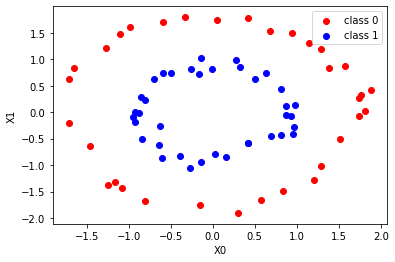

In [3]:
fig, ax = plt.subplots()

ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c = "red", label = 'class 0' )
ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c = "blue", label = 'class 1')

ax.set_xlabel('X0')
ax.set_ylabel('X1')

ax.legend(loc = 'best')

plt.show()

# 標準化をしているから、真ん中が0のプロットとなる

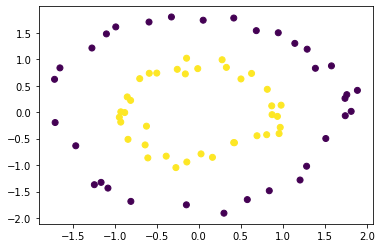

In [4]:
# 簡単な書き方もできる（c は色、連続値も指定できる）
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train)
plt.show()

In [5]:
print(X_train.shape)
print(y_train.shape)

(70, 2)
(70,)


In [6]:
# インスタンスを作成
svc = SVC(kernel = 'rbf', C = 1e3, probability=True)
    
# 結合データに学習をさせる（モデルの作成）
svc.fit(X_train, y_train)

SVC(C=1000.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

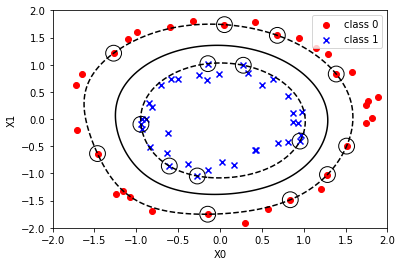

In [7]:
# プロットする
fig, ax = plt.subplots()
    
# 先ほどを同じプロットをする
ax.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c = 'red', marker = 'o', label = 'class 0')
ax.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c = 'blue', marker = 'x', label = 'class 1')

# マージンの線の長さを調整
xmin = -2.0
xmax = 2.0
ymin = -2.0
ymax = 2.0

# 決定境界とマージンをプロット（levels：マージンと決定境界の位置）
xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100), np.linspace(ymin, ymax, 100))
    
xy = np.vstack([xx.ravel(), yy.ravel()]).T
p = svc.decision_function(xy).reshape(100, 100)  
ax.contour(xx, yy, p, colors = 'k', levels = [-1, 0, 1], alpha = 1, linestyles = ['--', '-', '--'])

# サポートベクタをプロット（s：〇の大きさ）
ax.scatter(svc.support_vectors_[:, 0], svc.support_vectors_[:, 1], s = 250, facecolors = 'none', edgecolors = 'black')
    
ax.set_xlabel('X0')
ax.set_ylabel('X1')
    
ax.legend(loc = 'best')
    
plt.show()

In [8]:
y_proba = svc.predict_proba(X_test)[: , 1]
y_pred = svc.predict(X_test)

print(y_proba[:5])
print(y_pred[:5])
print(y_test[:5])

[0.99998279 0.01680679 0.98267058 0.02400808 0.82879465]
[1 0 1 0 1]
[1 0 1 0 1]


accuracy: 1.0
f1_score: 1.0


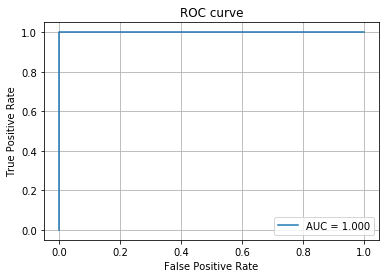

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
auc_score = roc_auc_score(y_test, y_proba)
plt.plot(fpr, tpr, label='AUC = %.3f' % (auc_score))
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid(True)

print('accuracy:',accuracy_score(y_test, y_pred))
print('f1_score:',f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      1.00      1.00        13

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



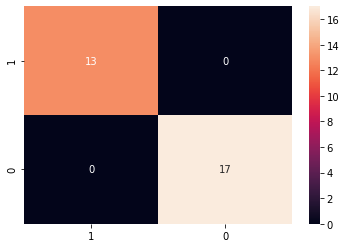

In [10]:
classes = [1, 0]
cm = confusion_matrix(y_test, y_pred, labels=classes)

cmdf = pd.DataFrame(cm, index=classes, columns=classes)

sns.heatmap(cmdf, annot=True)
print(classification_report(y_test, y_pred))